<img src="titanic_img.jpg" alt="Example Image" style="width: 1000px; height: 350px; object-fit: fill;">

## 1. Load the dataset

   - Loading the 'Titanic' dataset into the Jupyter notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

titanic_df = pd.read_csv('./Titanic-Dataset.csv',header=0) #read the dataset
display(titanic_df.head()) #look the first five rows
display(titanic_df.tail()) #look the last five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 2. Understanding the dataset Structure

In [2]:
print(titanic_df.shape)       # check the dimension of the dataset(rows, columns)

(891, 12)


   - There of 891 rows and 12 columns in the dataset.

In [3]:
print(titanic_df.info())      # get a detailed overview of the columns, datatypes and null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(titanic_df.describe())  # view a statistical summary of numerical columns.

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 3. Data Cleaning

### 3.1 Handling missing data

In [5]:
print(titanic_df.isnull().sum()) # check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


   - There are some null values in the columns - 'Age', 'Cabin', 'Embarked'.

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True) #fill missgle 'Ages' with median

   - Filling the missing values of 'Age' with 'median' since its a numerical columns and median is less prone to outliers, also preserves the overall distribution.

In [7]:
titanic_df.dropna(subset=['Embarked'], inplace = True) # Drop rows where 'Embarked' is missing

  - Dropping the rows where the 'Embarked' column contains null values, as there are only two such rows.

In [8]:
print(titanic_df.isnull().sum()) #discard 'Cabin' column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [9]:
missing_cabin_by_pclass = titanic_df.groupby('Pclass')['Cabin'].apply(lambda x: x.isnull().sum())
print('Missing cabin data by',missing_cabin_by_pclass)

Missing cabin data by Pclass
1     40
2    168
3    479
Name: Cabin, dtype: int64


  - The 'Cabin' feature is not particularly useful as it contains large percent of missing values(Over 75%), unstructured data(mixing of letters & numbers), and weakly correlated with 'Survived'. Additionally, 'Cabin' info is mostly available for 'higher-class passengers' which introduces bias. So, this column is not useful and no need to handle the null value.

### 3.2 Handling Duplicate data

In [10]:
print(titanic_df.duplicated().sum())
titanic_df.drop_duplicates(inplace = True)
print(titanic_df.shape)  # No duplicate rows

0
(889, 12)


   - There are no duplicate entries in the dataset.

### 3.3 Changing the data type

In [12]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


   - There are 5 features with the datatype 'object' (Name, Sex, Ticket, Cabin, Embarked). The 'Cabin' feature has already been discarded, and both 'Name' and 'Ticket' are not useful since they are unique to each passenger and do not provide meaningful patterns or correlations with survival or other variables.

In [13]:
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        202 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 78.4+ KB
None


   - Changing the datatype from 'Object' to 'category' results in memory efficiency and faster operations when dealing with the columns with limited number of unique values. Since the 'Object'(Strings) datatype uses more memory than 'Category'(categorical values).

## 4. Exploratory Data Visualization

### 4.1 Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

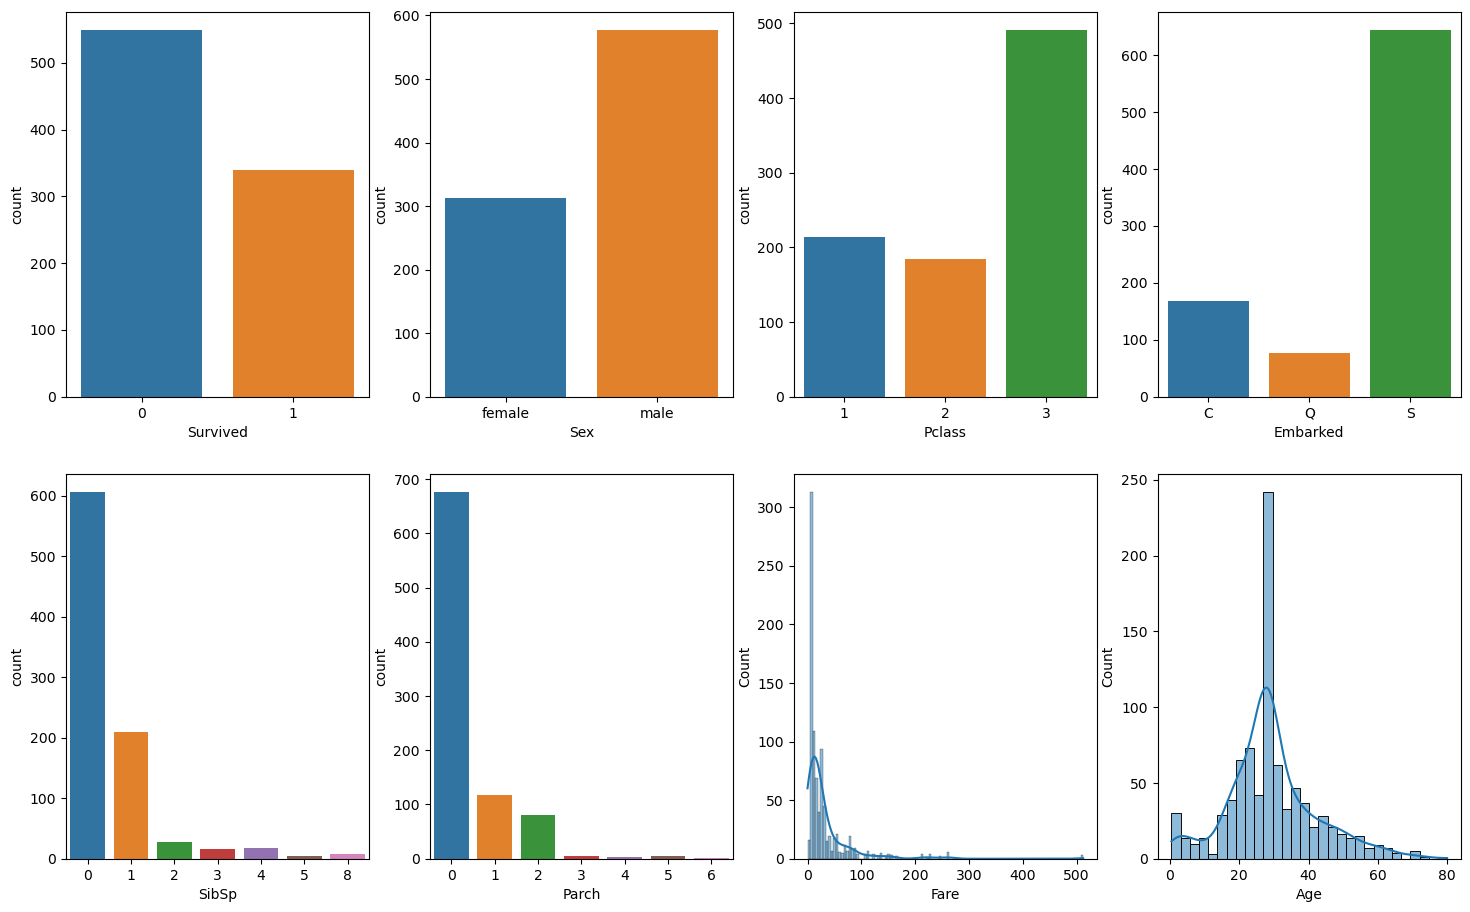

In [14]:
fig, axes = plt.subplots(2,4, figsize=(18,11))
sns.countplot(data=titanic_df, x='Survived', ax=axes[0,0]) # 0 - Not survived, 1 - Survived
sns.countplot(data=titanic_df, x='Sex', ax=axes[0,1]) 
sns.countplot(data=titanic_df, x='Pclass', ax=axes[0,2])
sns.countplot(data=titanic_df, x='Embarked', ax=axes[0,3])
sns.countplot(data=titanic_df, x='SibSp', ax=axes[1,0])
sns.countplot(data=titanic_df, x='Parch', ax=axes[1,1])
sns.histplot(titanic_df['Fare'], kde=True, ax=axes[1,2])
sns.histplot(titanic_df['Age'], kde=True, ax=axes[1,3])

**Findings:**

    1. Count plot of 'Survived': Shows that a majority of the passengers(549 - 62%) did not survive the Titanic disaster while a smaller percentage(340 - 38%) survived. This highlights that the odds of survival were lower for most passengers.
    
    2. Count plot of 'Sex': Shows that the majority of the passengers were 'male', with the smaller proportion of 'female'.
    
    3. Count plot of 'Pclass': Shows that the majority of the passengers in 'Third Class', followed by 'First Class'and 'Second Class'. This reflects 'Third Class' was less expensive and more crowded, so it makes sense that it would have more passengers. 
    
    4. Count plot of 'Embarked': Shows that the majority of passengers boarded the Titanic from 'Southampton', followed by 'Cherbourg' and 'Queenstown'. This reveals that 'Southampton' was the primary port of embarkation for Titanic passengers, which aligns with historical records, as the Titanic departed from Southampton on its maiden voyage.
    
    5. Count plot of 'SibSp' & 'Parch': Both plots reveal that the majority of passengers were traveling alone without siblings, spouses, parents, or children.
    
    6. Distribution plot of 'Fare': Its right-skewed which indicates majority of passengers paid lower fares, while a smaller subset paid significantly higher fares, it aligns with the 'Plclass' that many passengers were in 'Third Class'.
    
    7. Distribution plot of 'Age': Its slightly right-skewed which tells that most passengers are relatively young, some older passengers that influence the overall distribution.

### 4.2 Bivariate Analysis

  - Analyzing survival rate by each column - 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare'. 

<Axes: xlabel='Embarked', ylabel='count'>

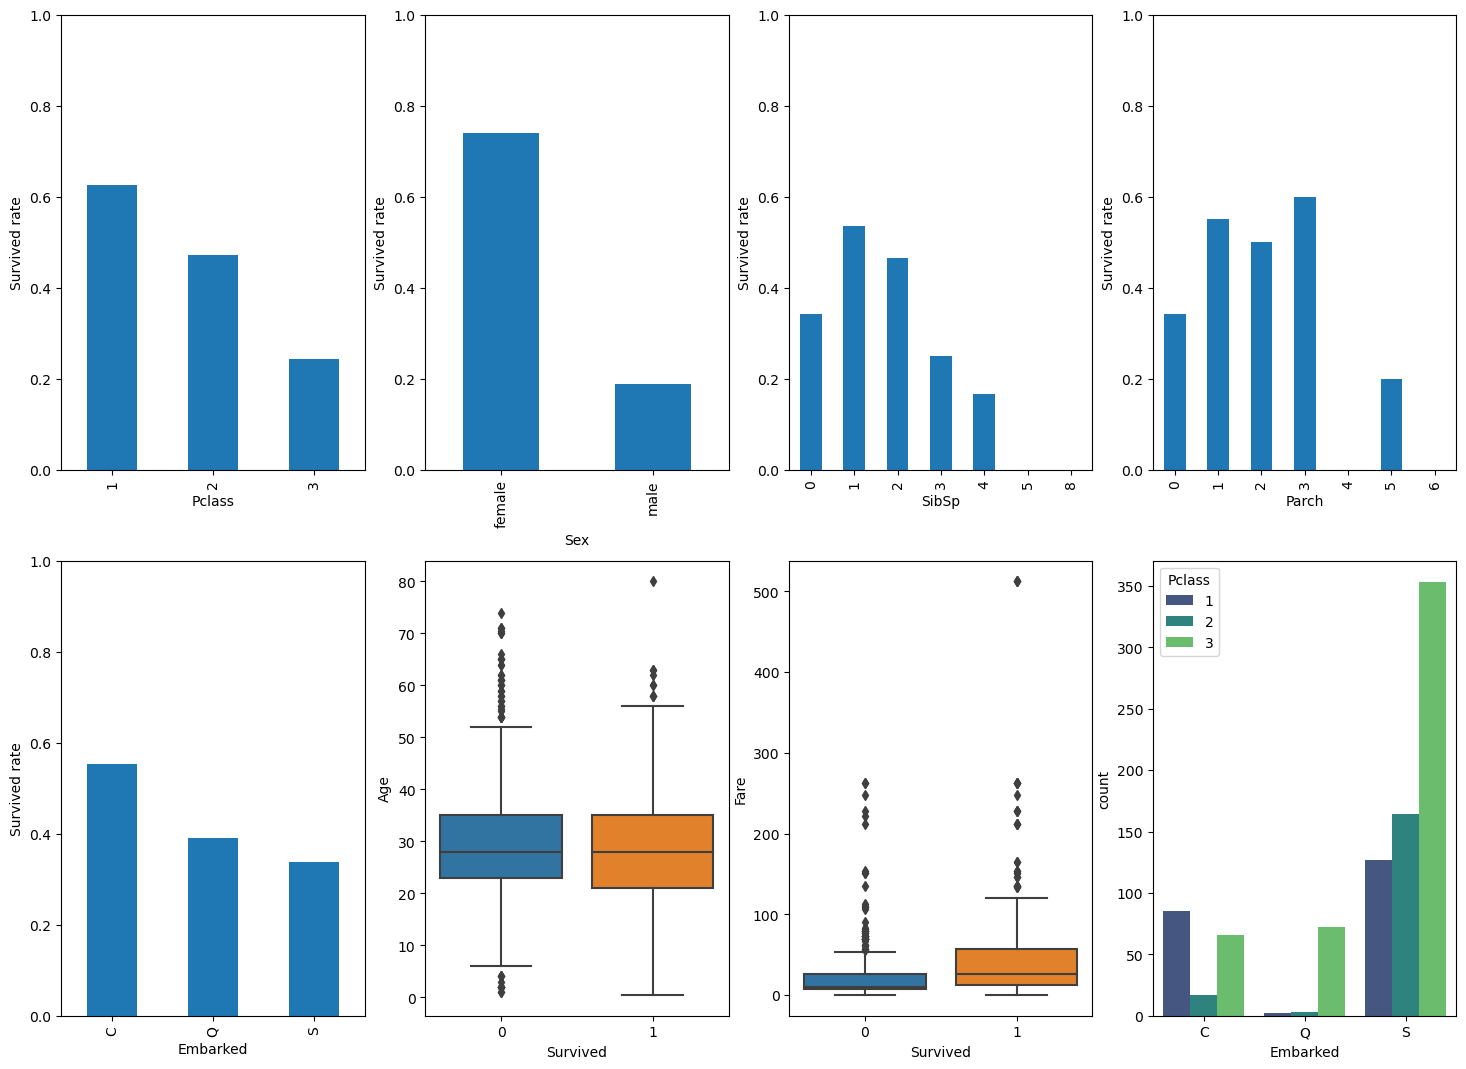

In [15]:
figBi, axesBi = plt.subplots(2,4, figsize=(18, 13))
titanic_df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axesBi[0,0], ylim=[0,1])
axesBi[0,0].set_ylabel('Survived rate')

titanic_df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axesBi[0,1],ylim=[0,1])
axesBi[0,1].set_ylabel('Survived rate')

titanic_df.groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=axesBi[0,2],ylim=[0,1])
axesBi[0,2].set_ylabel('Survived rate')

titanic_df.groupby('Parch')['Survived'].mean().plot(kind='bar', ax=axesBi[0,3],ylim=[0,1])
axesBi[0,3].set_ylabel('Survived rate')

titanic_df.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axesBi[1,0],ylim=[0,1])
axesBi[1,0].set_ylabel('Survived rate')

sns.boxplot(x='Survived', y='Age',data=titanic_df, ax=axesBi[1,1])
sns.boxplot(x='Survived', y='Fare',data=titanic_df, ax=axesBi[1,2])

sns.countplot(data=titanic_df, x='Embarked', hue='Pclass', palette='viridis')

**Findings:**
         
    1. 'Survived' by 'Pclass': Shows the higher survival rate for 'Pclass-1'('First class') passengers compared to 2nd and 3rd class, likely due to better access to lifeboats, preferential treatment, and overall better safety conditions.
    
    2. 'Survived' by 'Sex': Shows a higher survival rate for female passengers. This aligns with historical evidence that the "women and children first" policy was used during the Titanic disaster.
    
    3. 'Survived' by 'SibSp': Shows that the passengers with higher 'SibSp'(more siblings/spouses) have a lower survival rate, likely due to the larger family groups might have faced more challenges during the evacuation. 
    
    4. 'Survived' by 'Parch': Similary, the passengers with higher 'Parch'(more parents/children) also have a lower survival rate, likely due to the larger family groups might have faced more challenges during the evacuation. 
    
    5. 'Survived' by 'Embarked': The passengers 'embarked' at 'C' has higher survival rate compared to Q, and S. This aligns with the historical records that the ship took on a smaller number of passengers, mostly from First and Second Class, as it was not a major stop for third-class passengers(confirmed based on the 8th plot).
    
    6. Box plot of 'Age': A higher minimum age for non-survivors compared to survivors suggest that younger passengers had a higher likelihood of survival,"women and children first" this aligns with the "women and children first" policy.
    
    7. Box plot of 'Fare': The higher maximum and median fare values confirms that the higher passenger class has more survival rate. This reflects historical patterns where first-class passengers had better survival rates due to their better access to lifeboats and evacuation resources.

### 4.3 Fearture Correlation

<Axes: >

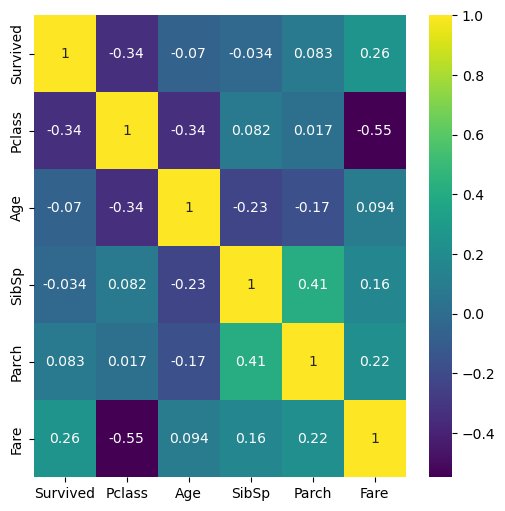

In [16]:
columns_to_remove = ['PassengerId','Cabin', 'Name']
numerical_df = titanic_df.drop(columns=columns_to_remove)

f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(numerical_df.corr(numeric_only=True), annot=True, cmap='viridis', ax=ax)

**Findings**

    From the heatmap:
        1. Higher negative correlation between 'Pclass' & 'Survived' - as Pclass value increase(means lower class), odds of survival decreases.
        
        2. Higher positive correlation between 'Fare' & 'Survived' - as the Fare increases(means higher class), higher chances of survival.
        
        3. Higher negative correaltion between 'Pclass' & 'Fare' - as fare increases, pclass decreases(means higher class). As fare decreases, pclass increases(means lower class). 

## 4. Conclusions/Insights

### 4.1 Did passengers in higher classes (Pclass) have a better survival rate compared to those in lower classes?

   - Yes. accoding to the bar plot of 'Survived' by 'Pclass', passenger class on the Titanic had a strong correlation with survival. First-class passengers (Pclass 1) had the highest survival rate at 63%, followed by second-class passengers (47%), and third-class passengers had the lowest survival rate at 24%. 
   - This suggests that **higher-class passengers** had better access to lifeboats and safety measures during the disaster, giving them a **higher chance of survival.**

### 4.2 Was there any evocation policy implemented during the crisis? 

  - Yes. Based on the bar plot, the **'women and children first' policy seems to have been applied.**
  - The analysis showed that **women had a survival rate of approximately 74%, while only 19% of men survived.**   
  - Additionally, the **median age of survivors was lower than that of non-survivors**, and the distribution showed that **many children (under 16 years) were among the survivors.** 

### 4.3. Did passengers with more family members aboard (based on SibSp and Parch) have different survival rates compared to those traveling alone?

  - Yes. The barplot of 'SibSp' (siblings/spouses aboard) vs 'survival rate' and Parch (parents/children aboard) vs 'survival rate' shows that passengers traveling with **larger families had a 'lower survival' rate** compared to those traveling alone.

### 4.4. Was there a difference in survival rates based on the port of embarkation (Embarked)?

   - Yes. Based on the barplot of 'Embarked' vs 'survival rate', the passengers 'embarked' at **'C' has higher survival rate compared to Q, and S.**
   - Since, the ship took on a **smaller number of passengers, and mostly from First and Second Class.** This has already showed that **higher class passenger had higher odds of survival.**

### 4.5. How does the survival rate vary across different age groups? For instance, did children (under a certain age) have a higher survival rate compared to adults?

  - Yes. The boxplot of 'Age' vs 'Survival rate' showed that **many children (under 16 years) were among the survivors.** 

### 4.6 Is there a relationship between the ticket fare and the survival rate within each class?

  - Yes, Based on the heatmap, there is a clear relationship between 'ticket fare', 'class', and 'survival rate'. 
  - Passengers who **paid higher fares were more likely to be in higher classes (Pclass 1), and those in higher classes had a significantly higher survival rate compared to lower classes.**

### 4.7. Does having a known cabin number (i.e., not missing) correlate with a higher survival rate?


- The 'Cabin' feature is **not particularly useful as it contains large percent of missing values(Over 75%), unstructured data(mixing of letters & numbers).** 
- Additionally, 'Cabin' info is mostly available for 'higher-class passengers' which introduces bias. However, we can say **high class passengers has a higher survival rate.**